LIGN 167 Stock prediction Final projects
- https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632
 

Names

Data sources
- https://www.kaggle.com/datasets/kannan1314/amazon-stock-price-all-time
- https://www.kaggle.com/datasets/varpit94/google-stock-data
- https://www.kaggle.com/datasets/akpmpr/updated-netflix-stock-price-all-time

Code sources  

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch.autograd import Variable

Data Frame

In [158]:
Amazon = pd.read_csv("DataFile/Amazon.csv")
Amazon['Date'] = pd.to_datetime(Amazon['Date'])
Amazon_2010_2015 = Amazon[~(Amazon['Date'] > '2015-12-31')]
Amazon_2010_2015 = Amazon_2010_2015[~(Amazon_2010_2015['Date'] < '2010-1-1')]
Amazon_2010_2015

,Date,Open,High,Low,Close,Adj Close,Volume
3179,2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
3180,2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
3181,2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
3182,2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
3183,2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500
...,...,...,...,...,...,...,...
4684,2015-12-24,663.349976,664.679993,660.599976,662.789978,662.789978,1091200
4685,2015-12-28,665.559998,675.500000,665.500000,675.200012,675.200012,3783600
4686,2015-12-29,677.979980,696.440002,677.890015,693.969971,693.969971,5735000
4687,2015-12-30,691.890015,695.489990,686.380005,689.070007,689.070007,3519000


In [74]:
Google = pd.read_csv("DataFile/GOOGL.csv")
Google['Date'] = pd.to_datetime(Google['Date'])
Google_2010_2015 = Google[~(Google['Date'] > '2015-12-31')]
Google_2010_2015 = Google_2010_2015[~(Google_2010_2015['Date'] < '2010-1-1')].reset_index(drop = True)
Google_2010_2015

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,313.788788,315.070068,312.432434,313.688690,313.688690,3908488
1,2010-01-05,313.903900,314.234222,311.081085,312.307312,312.307312,6003391
2,2010-01-06,313.243256,313.243256,303.483490,304.434448,304.434448,7949443
3,2010-01-07,305.005005,305.305298,296.621613,297.347351,297.347351,12815771
4,2010-01-08,296.296295,301.926941,294.849854,301.311310,301.311310,9439151
...,...,...,...,...,...,...,...
1505,2015-12-24,768.520020,769.200012,764.390015,765.840027,765.840027,520600
1506,2015-12-28,770.000000,782.820007,767.729980,782.239990,782.239990,1557800
1507,2015-12-29,786.989990,798.690002,786.200012,793.960022,793.960022,1921500
1508,2015-12-30,793.960022,796.460022,787.200012,790.299988,790.299988,1428300


In [75]:
Netflix = pd.read_csv("DataFile/netflix.csv")
Netflix['Date'] = pd.to_datetime(Netflix['Date'])
Netflix_2010_2015 = Netflix[~(Netflix['Date'] > '2015-12-31')]
Netflix_2010_2015 = Netflix_2010_2015[~(Netflix_2010_2015['Date'] < '2010-1-1')].reset_index(drop = True)
Netflix_2010_2015

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.961429,7.565714,7.931429,7.640000,17239600.0,7.640000
1,2010-01-05,7.657143,7.258571,7.652857,7.358571,23753100.0,7.358571
2,2010-01-06,7.672857,7.197143,7.361429,7.617143,23290400.0,7.617143
3,2010-01-07,7.757143,7.462857,7.731429,7.485714,9955400.0,7.485714
4,2010-01-08,7.742857,7.465714,7.498571,7.614286,8180900.0,7.614286
...,...,...,...,...,...,...,...
1505,2015-12-24,118.800003,117.300003,118.220001,117.330002,3531300.0,117.330002
1506,2015-12-28,117.349998,113.849998,117.260002,117.110001,8424300.0,117.110001
1507,2015-12-29,119.599998,116.919998,118.190002,119.120003,8159200.0,119.120003
1508,2015-12-30,119.019997,116.430000,118.949997,116.709999,8149700.0,116.709999


Regession line

In [122]:
def regressionLine(y):
    days = np.size(y)
    x = []
    for i in range(1,days+1):
        x.append(i)
    x = np.array(x)

    avgX = np.average(x)
    avgY = np.average(y)
    SumX = np.sum(x)
    SumY = np.sum(y)

    xy = 0
    xx = 0
    for i in range(len(x)):
        xy = xy + (x[i]- avgX) * (y[i] - avgY)
        xx = xx + (x[i]- avgX)**2
    
    slope = xy/xx
    b = avgY - slope*avgX
    return (b, slope)




In [141]:
def plotRegressionLine(df , company, b):
    # plotting the actual points as scatter plot
    y = df["Close"]
    date = df["Date"]
    
    x = []
    for i in range(1, np.size(y) + 1):
        x.append(i)
    x = np.array(x)
    plt.scatter(date, y, color = "m",
               marker = "o", s = 30)
  
    # predicted stock price
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(date, y_pred, color = "b")
  
    # putting labels
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(company  + " stock price from 2010 to 2015")
    # function to show plot
    plt.show()

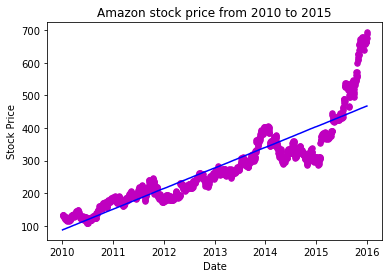

In [160]:
Amazonb = (regressionLine(Amazon_2010_2015["Close"]))
plotRegressionLine(Amazon_2010_2015,"Amazon", Amazonb)

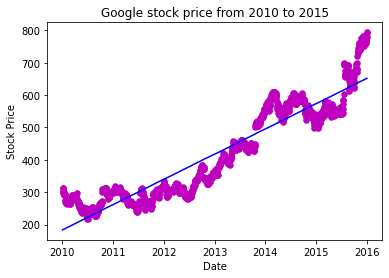

In [149]:
Googleb = (regressionLine(Google_2010_2015["Close"]))
plotRegressionLine(Google_2010_2015,"Google", Googleb)

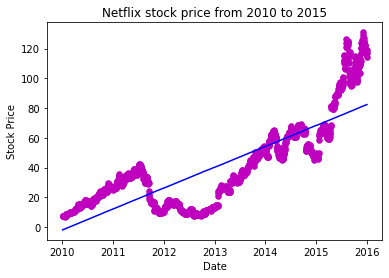

In [148]:
Netflixb = (regressionLine(Netflix_2010_2015["Close"]))
plotRegressionLine(Netflix_2010_2015,"Netflix", Netflixb)

logistic regression linear
# 

LSTM
# Pytorch

GRU
# pytorch